#Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [39]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [58]:
import pandas as pd
# Read the Excel file
df = pd.read_csv('Fraud_check.csv')
# Display the first few rows of the dataset
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [7]:
# Display the first few rows of the dataset
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [38]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [8]:
# Summary statistics of the numerical columns
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
df.describe(include=object)

,Undergrad,Marital.Status,Urban
count,600,600,600
unique,2,3,2
top,YES,Single,YES
freq,312,217,302


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [11]:
df.shape

(600, 6)

# to remove duplicated values

In [12]:
#finding duplicates
df.duplicated().sum()

0

# To deal with missing values

In [48]:
#finding missing values
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
Fraud              0
dtype: int64

#Analysing data

Text(0.5, 1.0, 'Correlation Map')

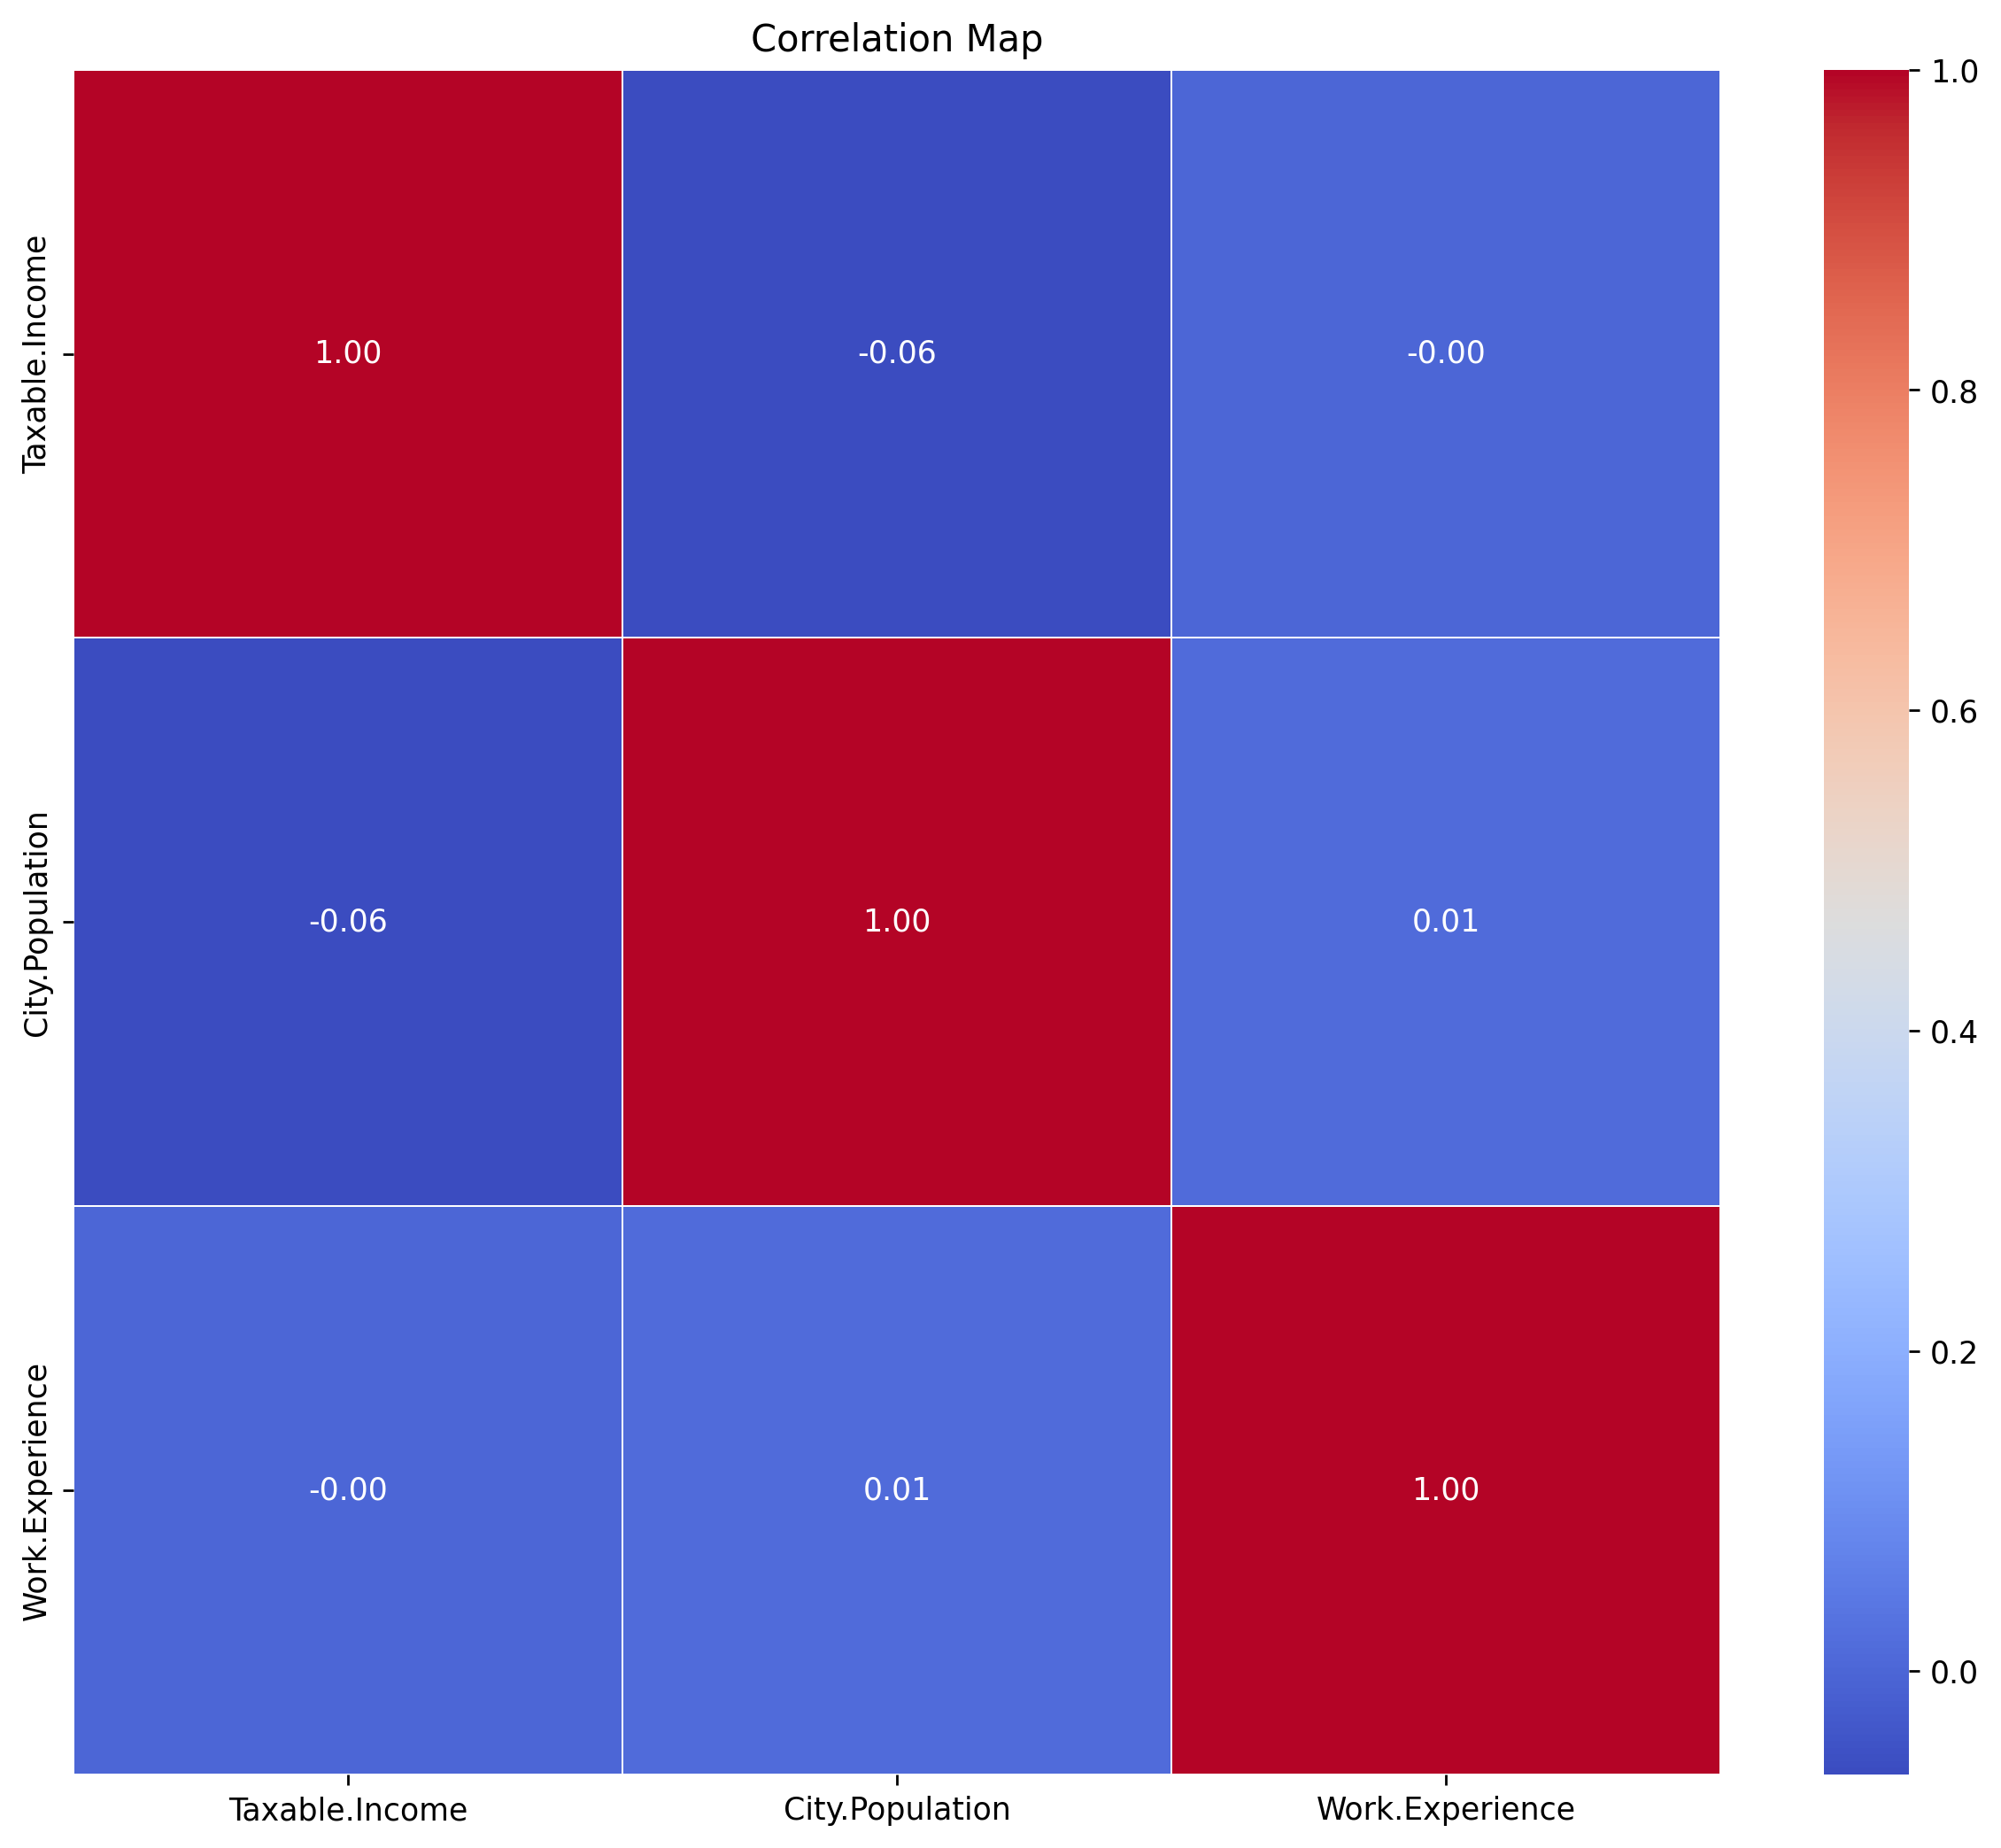

In [15]:
# Assuming df is your DataFrame containing numerical columns
s = df.select_dtypes(include="number").corr()
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
# Create a heatmap with a diverging color map and display the correlation coefficients
sns.heatmap(s, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
# Add a title
plt.title("Correlation Map")

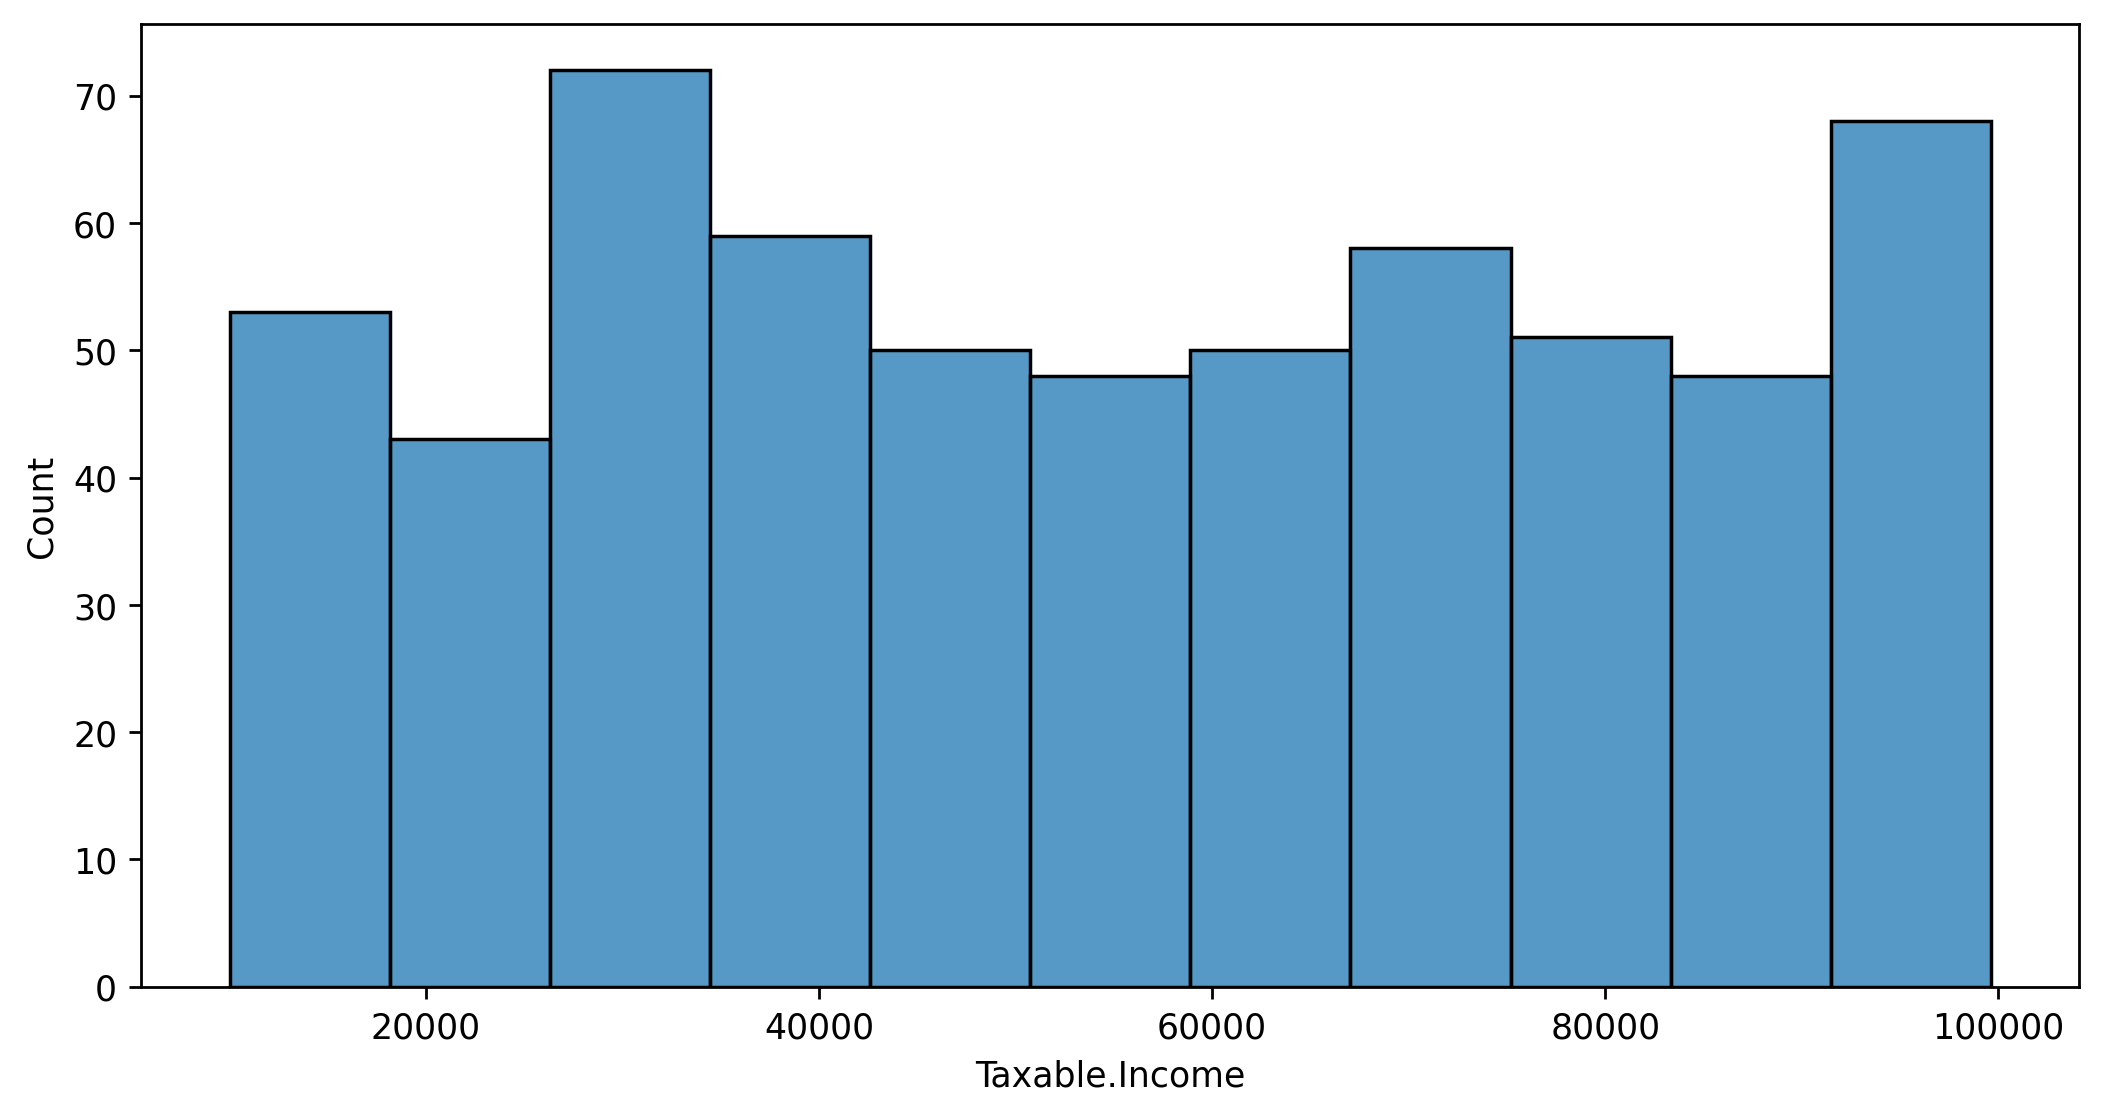

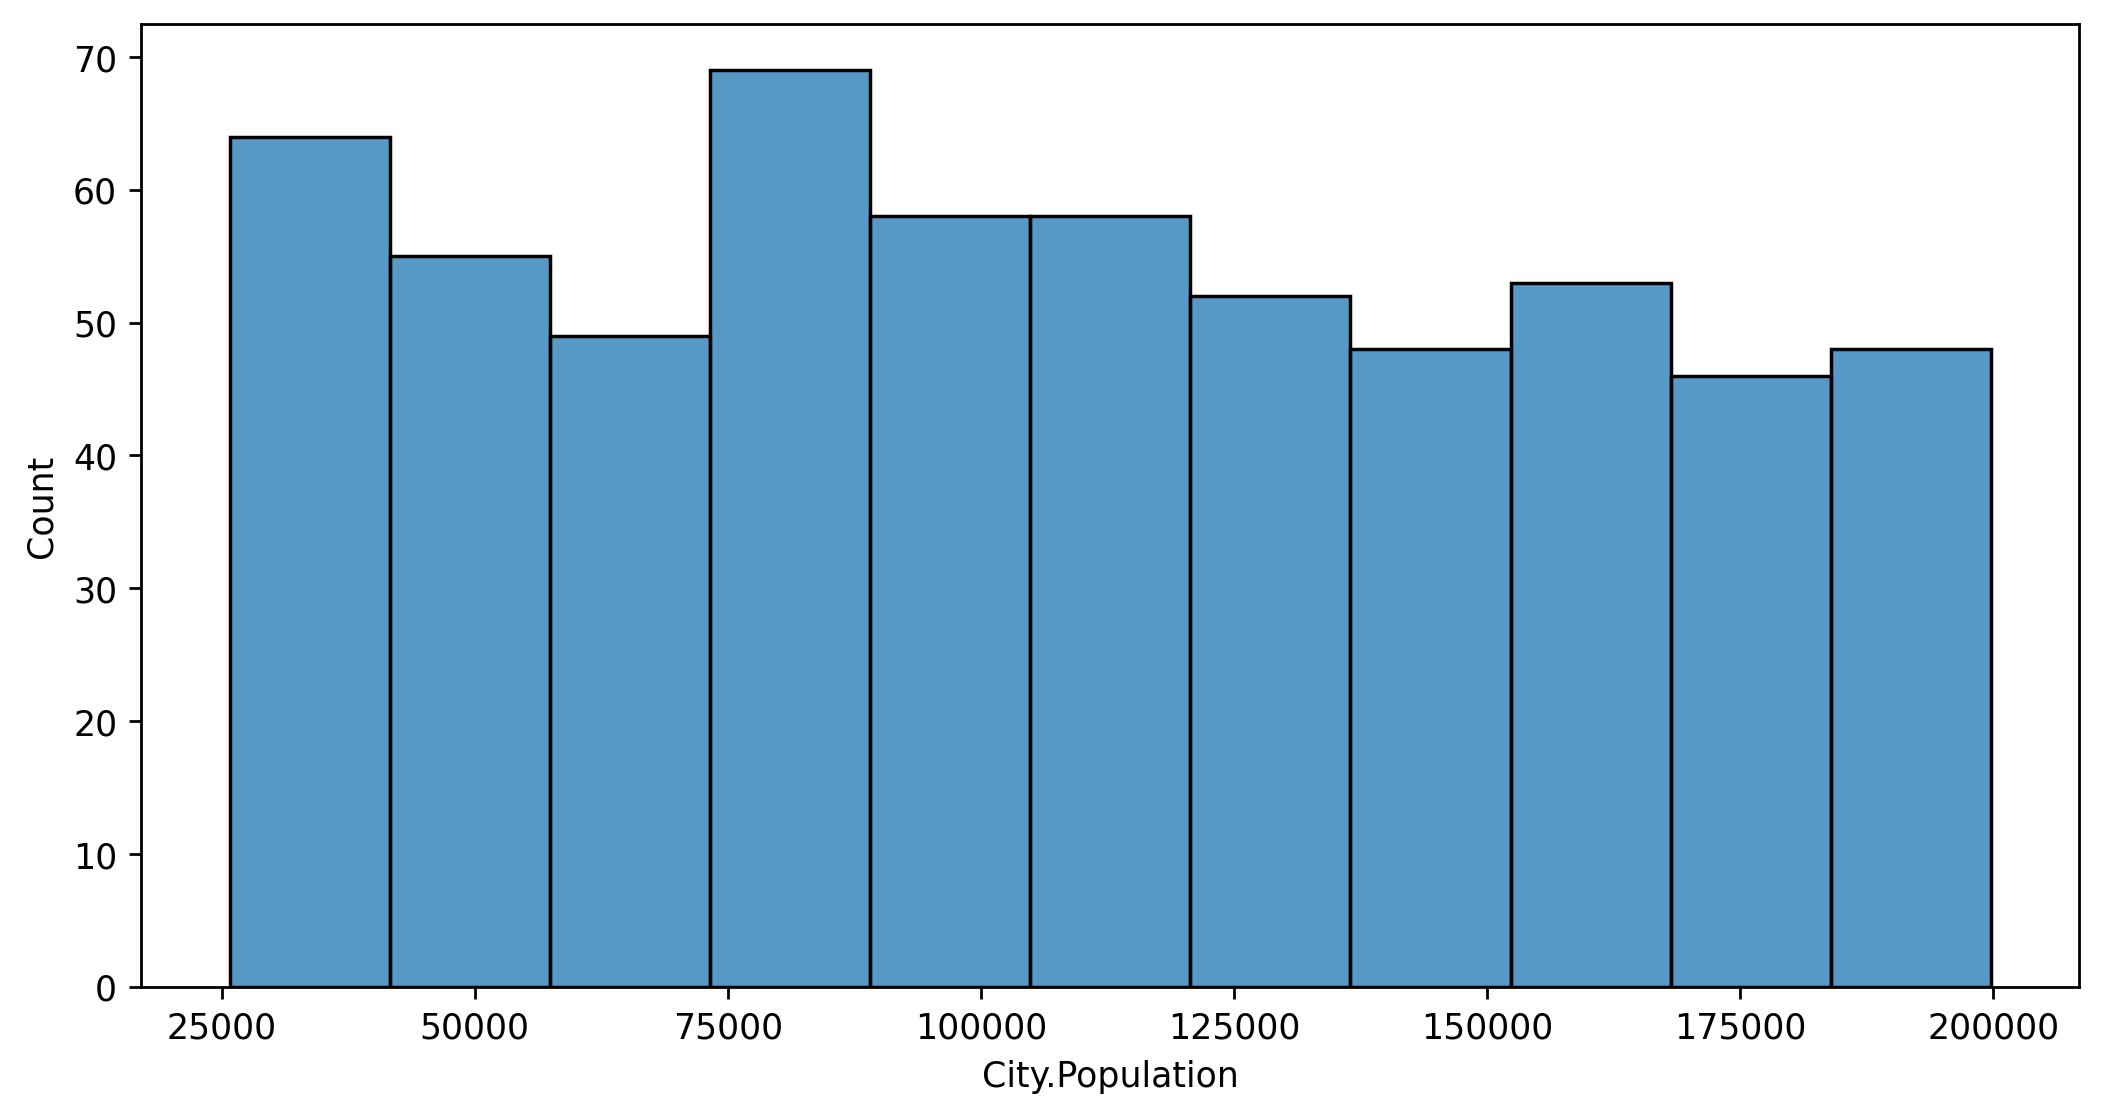

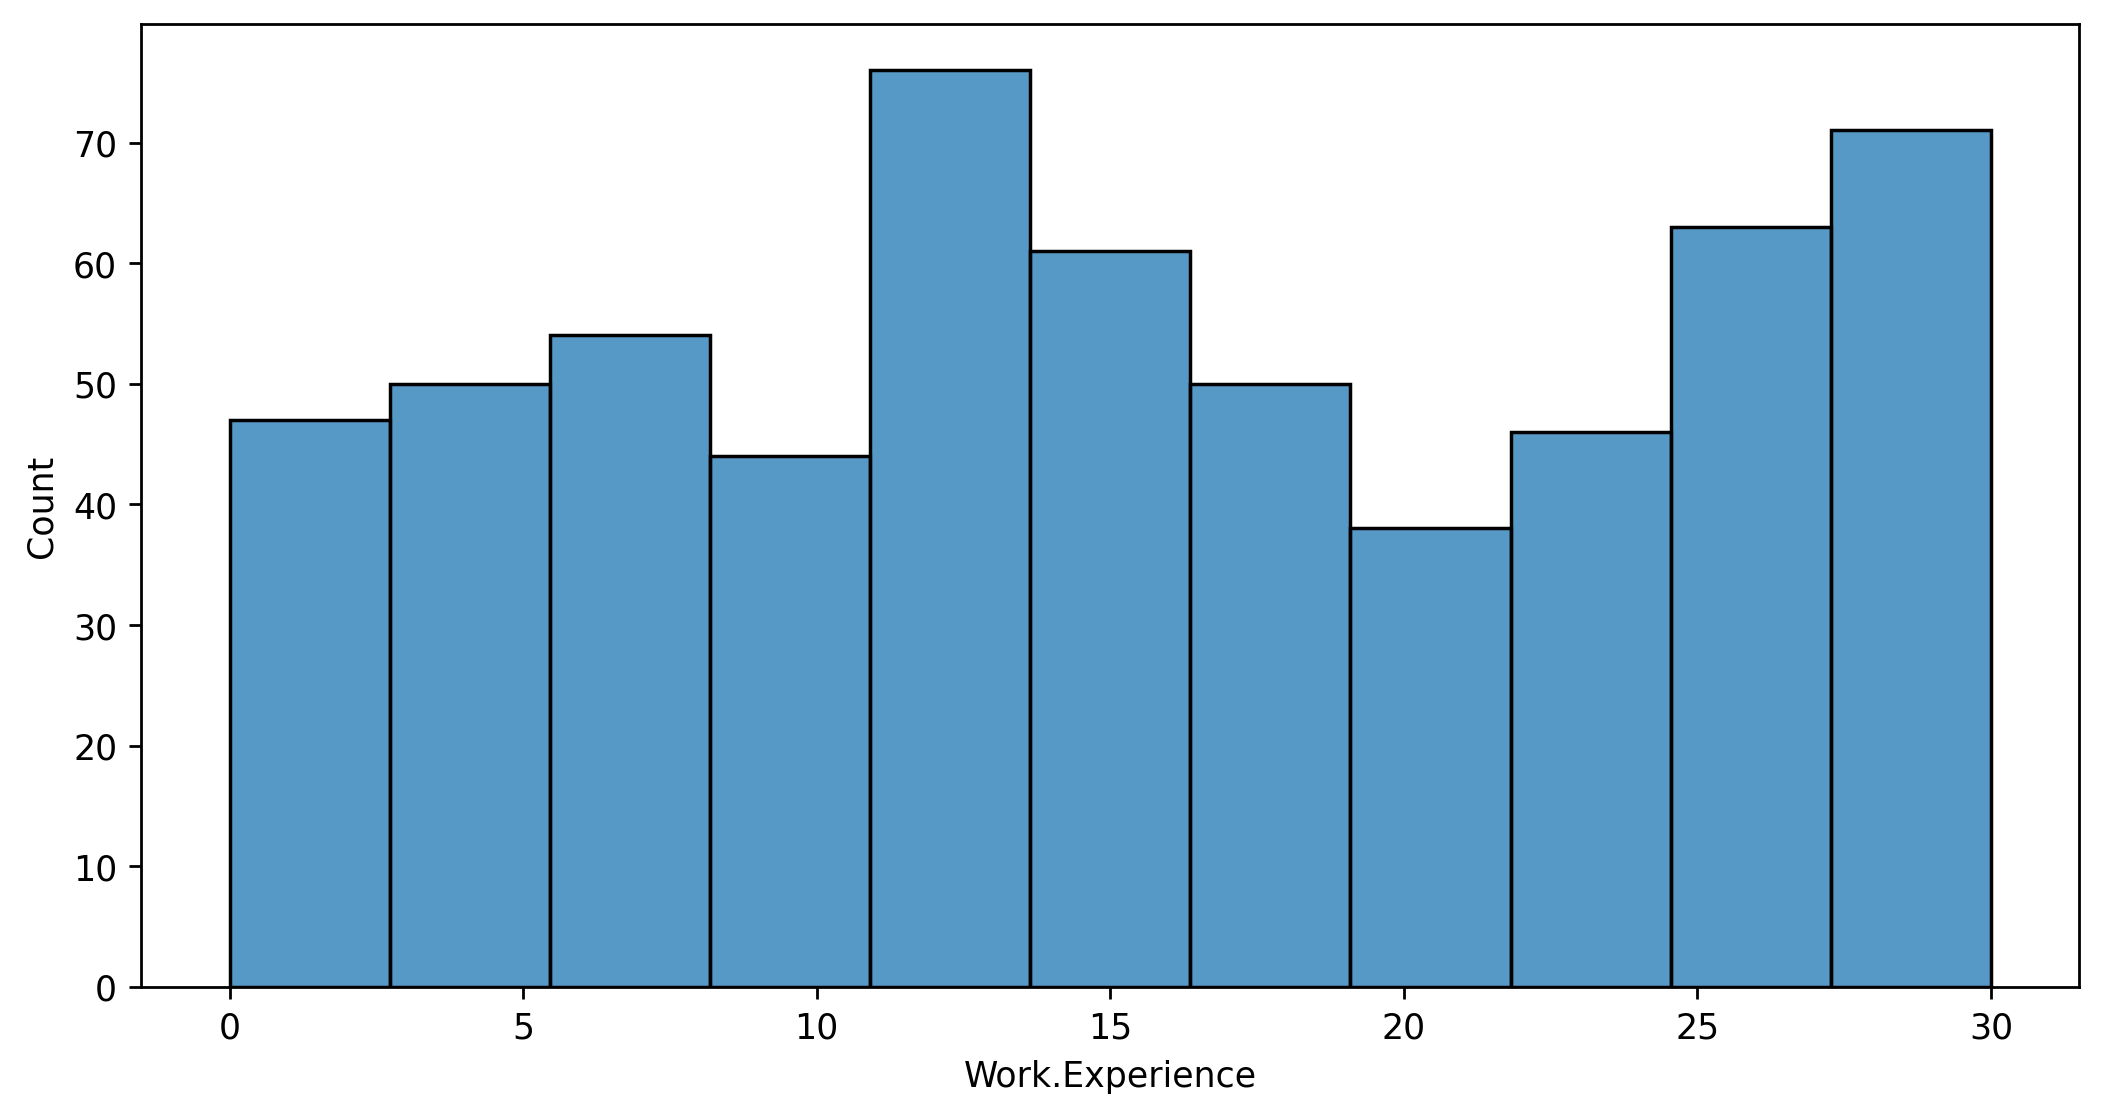

In [17]:
#Histogram
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df,x=i)
  plt.show()

# encodeng -coverting object data in to numeric column

In [19]:
cat_cols = df.select_dtypes(object).columns
cat_cols

Index(['Undergrad', 'Marital.Status', 'Urban'], dtype='object')

In [20]:
oe = OrdinalEncoder()

df[cat_cols] = oe.fit_transform(df[cat_cols])

In [21]:
df[cat_cols]

,Undergrad,Marital.Status,Urban
0,0.0,2.0,1.0
1,1.0,0.0,1.0
2,0.0,1.0,1.0
3,1.0,2.0,1.0
4,0.0,1.0,0.0
...,...,...,...
595,1.0,0.0,1.0
596,1.0,0.0,1.0
597,0.0,0.0,1.0
598,1.0,1.0,0.0


In [22]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0.0,2.0,68833,50047,10,1.0
1,1.0,0.0,33700,134075,18,1.0
2,0.0,1.0,36925,160205,30,1.0
3,1.0,2.0,50190,193264,15,1.0
4,0.0,1.0,81002,27533,28,0.0
...,...,...,...,...,...,...
595,1.0,0.0,76340,39492,7,1.0
596,1.0,0.0,69967,55369,2,1.0
597,0.0,0.0,47334,154058,0,1.0
598,1.0,1.0,98592,180083,17,0.0


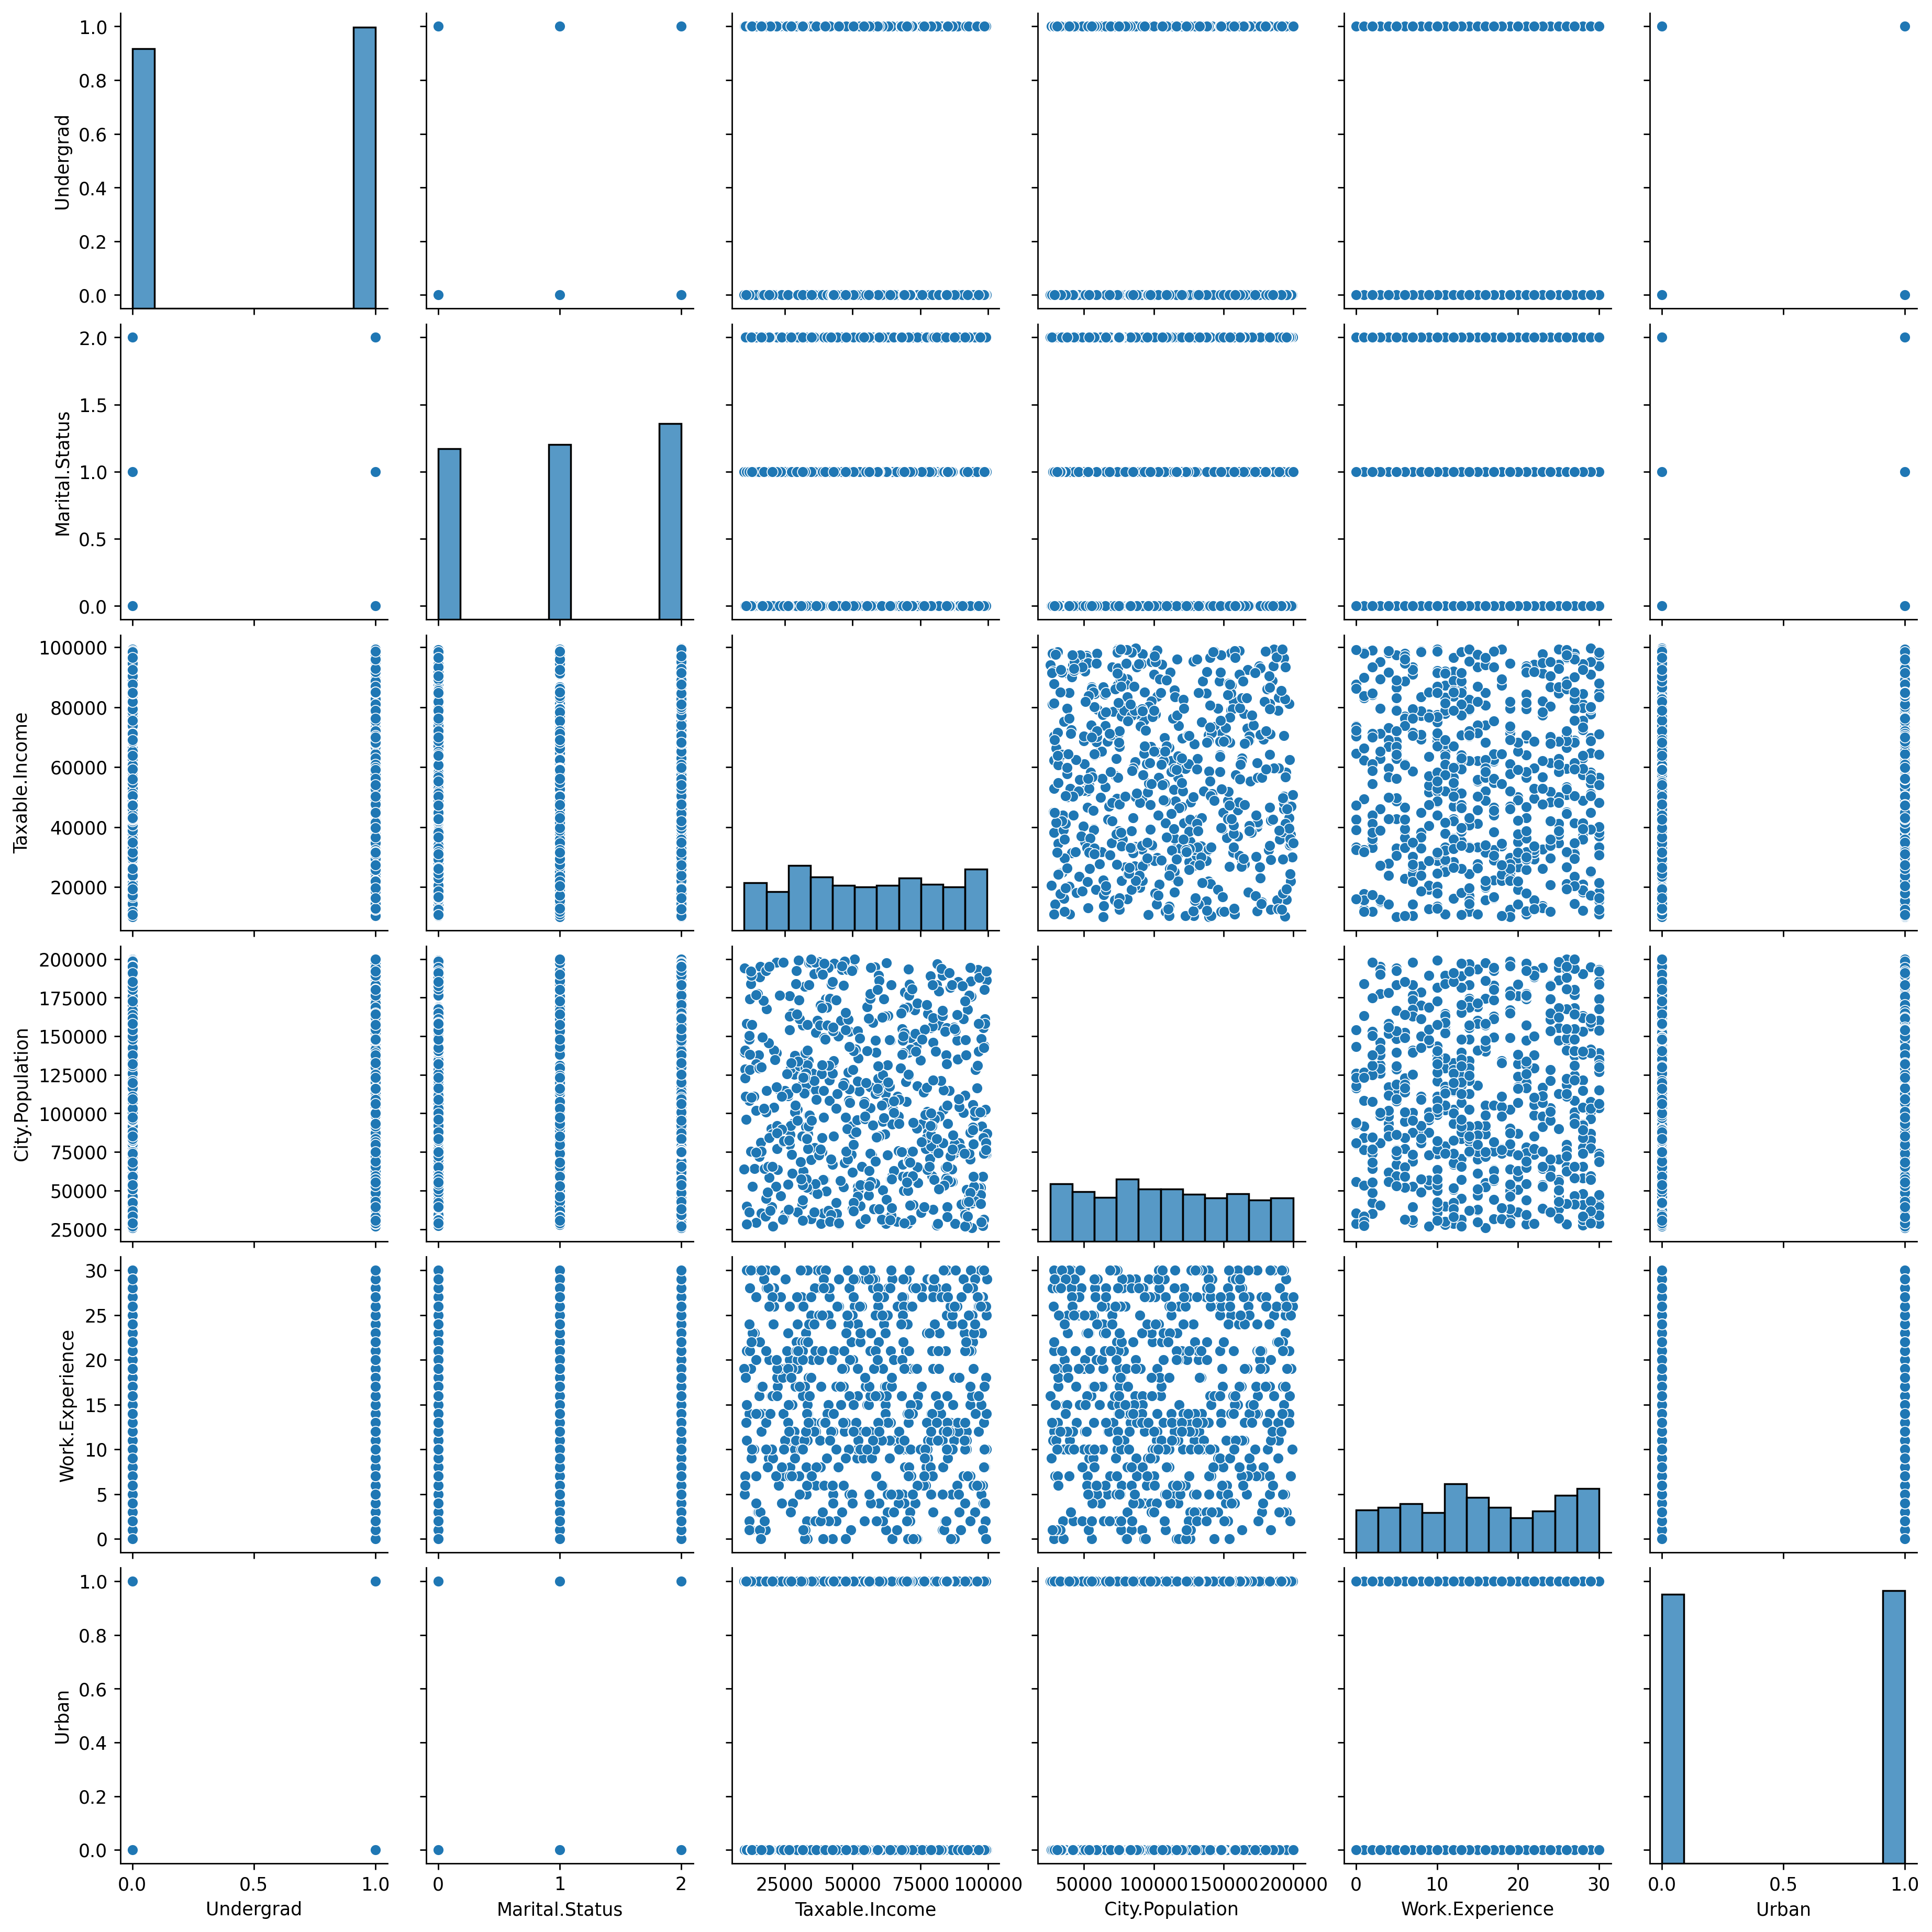

In [33]:
plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['figure.dpi'] = 250
sns.pairplot(df)

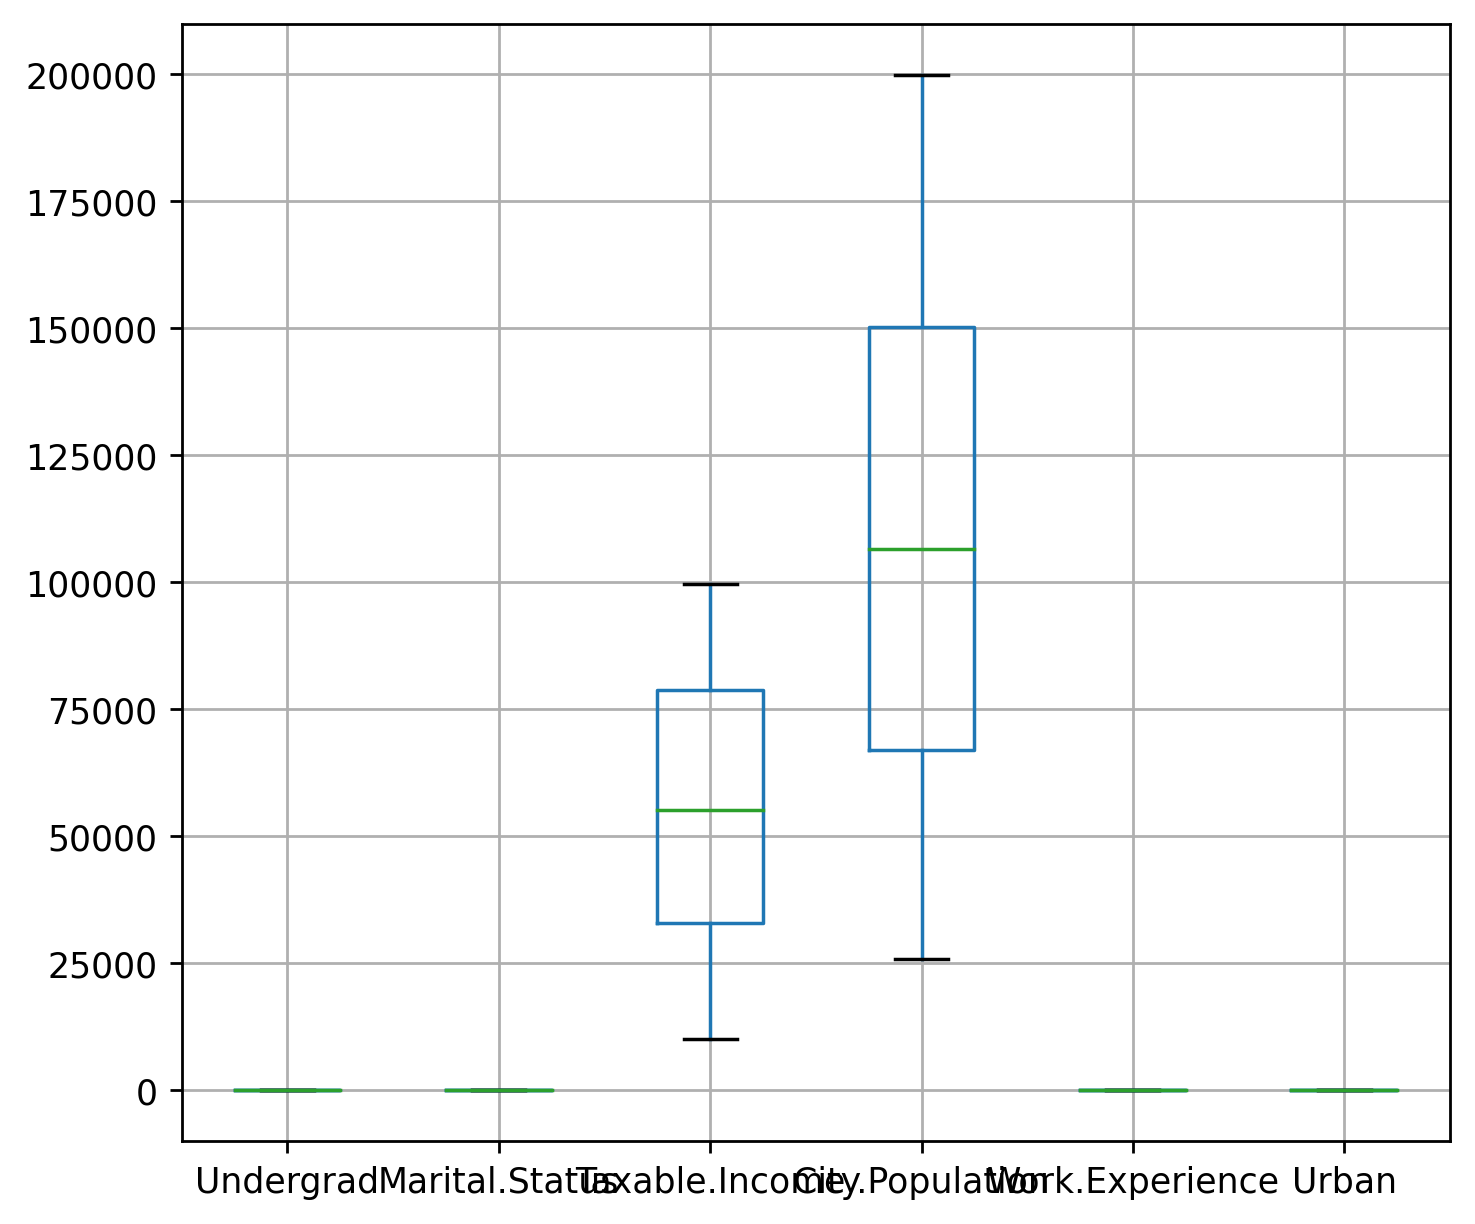

In [37]:
df.boxplot()
plt.tight_layout()

#model building

In [55]:
from sklearn.model_selection import GridSearchCV

# Create a new target variable 'Fraud' based on taxable_income
df['Fraud'] = df['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'Good')

# Features and target variable
X = df[['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']]
y = df['Fraud']

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.775

Confusion Matrix:
 [[93  1]
 [26  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.99      0.87        94
           1       0.00      0.00      0.00        26

    accuracy                           0.78       120
   macro avg       0.39      0.49      0.44       120
weighted avg       0.61      0.78      0.68       120



In [56]:
from sklearn.metrics import accuracy_score
# Predictions on the training set
y_train_pred = rf_classifier.predict(X_train)
# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)
# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.775


#logistic regression with L2 regularization

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Create a new target variable 'Fraud' based on taxable_income
y = df['Taxable.Income'].apply(lambda x: 1 if x <= 30000 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model with L2 regularization (Ridge)
model = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))

# Train the model
model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy)

# Calculate testing accuracy
testing_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", testing_accuracy)


Training Accuracy: 0.7958333333333333
Testing Accuracy: 0.7833333333333333


In [46]:
from sklearn.model_selection import cross_val_score
# Create a logistic regression model with L2 regularization (Ridge)
model = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2'))

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

In [47]:
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)

Cross-Validation Scores: [0.8        0.79166667 0.79166667 0.79166667 0.79166667]
Mean Cross-Validation Score: 0.7933333333333332


Number of Estimators: 100


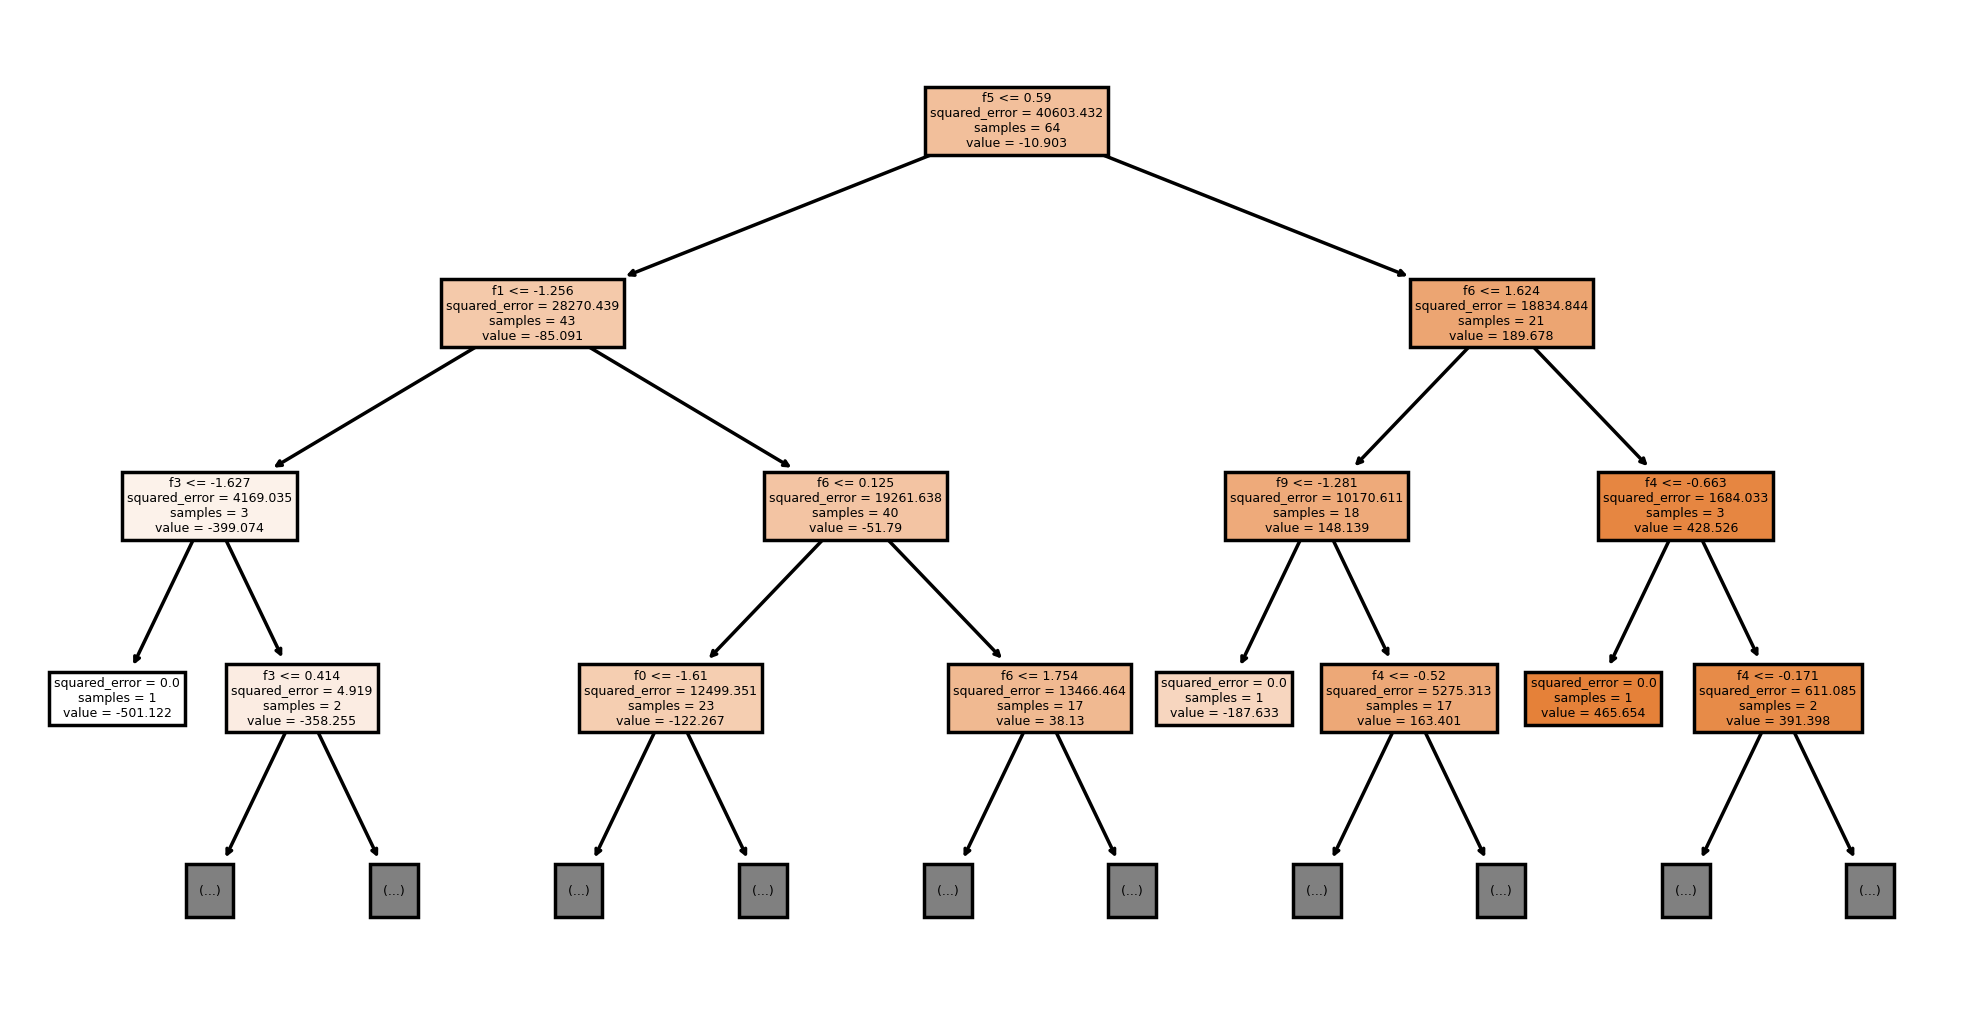

In [59]:
from sklearn.datasets import make_regression
from sklearn.tree import plot_tree
# Generate some example data
X, y = make_regression(n_samples=100, n_features=10, noise=0.1, random_state=42)

# Create and fit the RandomForestRegressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Check the number of estimators
print("Number of Estimators:", len(rf.estimators_))

# Plot the first tree
plot_tree(rf.estimators_[0], feature_names=['f'+str(i) for i in range(X.shape[1])], filled=True, max_depth=3)
plt.show()